##  Task 1: Introduction and Overview of the Project


In this guided project, we will:

- Define Neural Networks <br/>
- Explain how Convolutional Neural Networks Work <br/>
- Build a CNN from Scratch! <br/>
We will build an image classifier with Tensorflow, and you can use the Convolutional Neural Network that you will create as a template for your future Image Classification tasks!

At the end of this project, you will try out an amazing Bonuc Exercise about Neural Networks!

## Task 2: Understand the Structure of Neural Networks

## Task 3: Components of Convolutional Neural Networks

## Task 4: Import the Dataset and Preprocess the Data

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.10.0'

In [3]:
import os 
import zipfile

local_zip = 'Classification/training_set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Classification/training_set')
local_zip = 'Classification/validation_set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Classification/validation_set')
zip_ref.close()

In [4]:
train_dog_dir = os.path.join(r'D:\Project3\training_set\dogs')
train_cat_dir = os.path.join(r'D:\Project3\training_set\cats')
validation_dog_dir = os.path.join(r'D:\Project3\validation_set\dogs')
validation_cats_dir = os.path.join(r'D:\Project3\validation_set\cats')

In [6]:
train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

train_cats_names = os.listdir(train_cat_dir)
print(train_cats_names[:10])

validation_dog_names = os.listdir(validation_dog_dir)
print(validation_dog_names[:10])

validation_cats_names = os.listdir(validation_cats_dir)
print(validation_cats_names[:10])

['.DS_Store', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg']
['.DS_Store', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg']
['.DS_Store', 'dog.4001.jpg', 'dog.4002.jpg', 'dog.4003.jpg', 'dog.4004.jpg', 'dog.4005.jpg', 'dog.4006.jpg', 'dog.4007.jpg', 'dog.4008.jpg', 'dog.4009.jpg']
['.DS_Store', 'cat.4001.jpg', 'cat.4002.jpg', 'cat.4003.jpg', 'cat.4004.jpg', 'cat.4005.jpg', 'cat.4006.jpg', 'cat.4007.jpg', 'cat.4008.jpg', 'cat.4009.jpg']


In [10]:
print('Total training dogs images: ', len(os.listdir(train_dog_dir)))
print('Total training cats images: ', len(os.listdir(train_cat_dir)))
print('Total validation dogs images: ', len(os.listdir(validation_dog_dir)))
print('Total validation cats images: ', len(os.listdir(validation_cats_dir)))

Total training dogs images:  4001
Total training cats images:  4001
Total validation dogs images:  1001
Total validation cats images:  1001


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mping

nrows = 4
nclos = 4

pic_index = 0

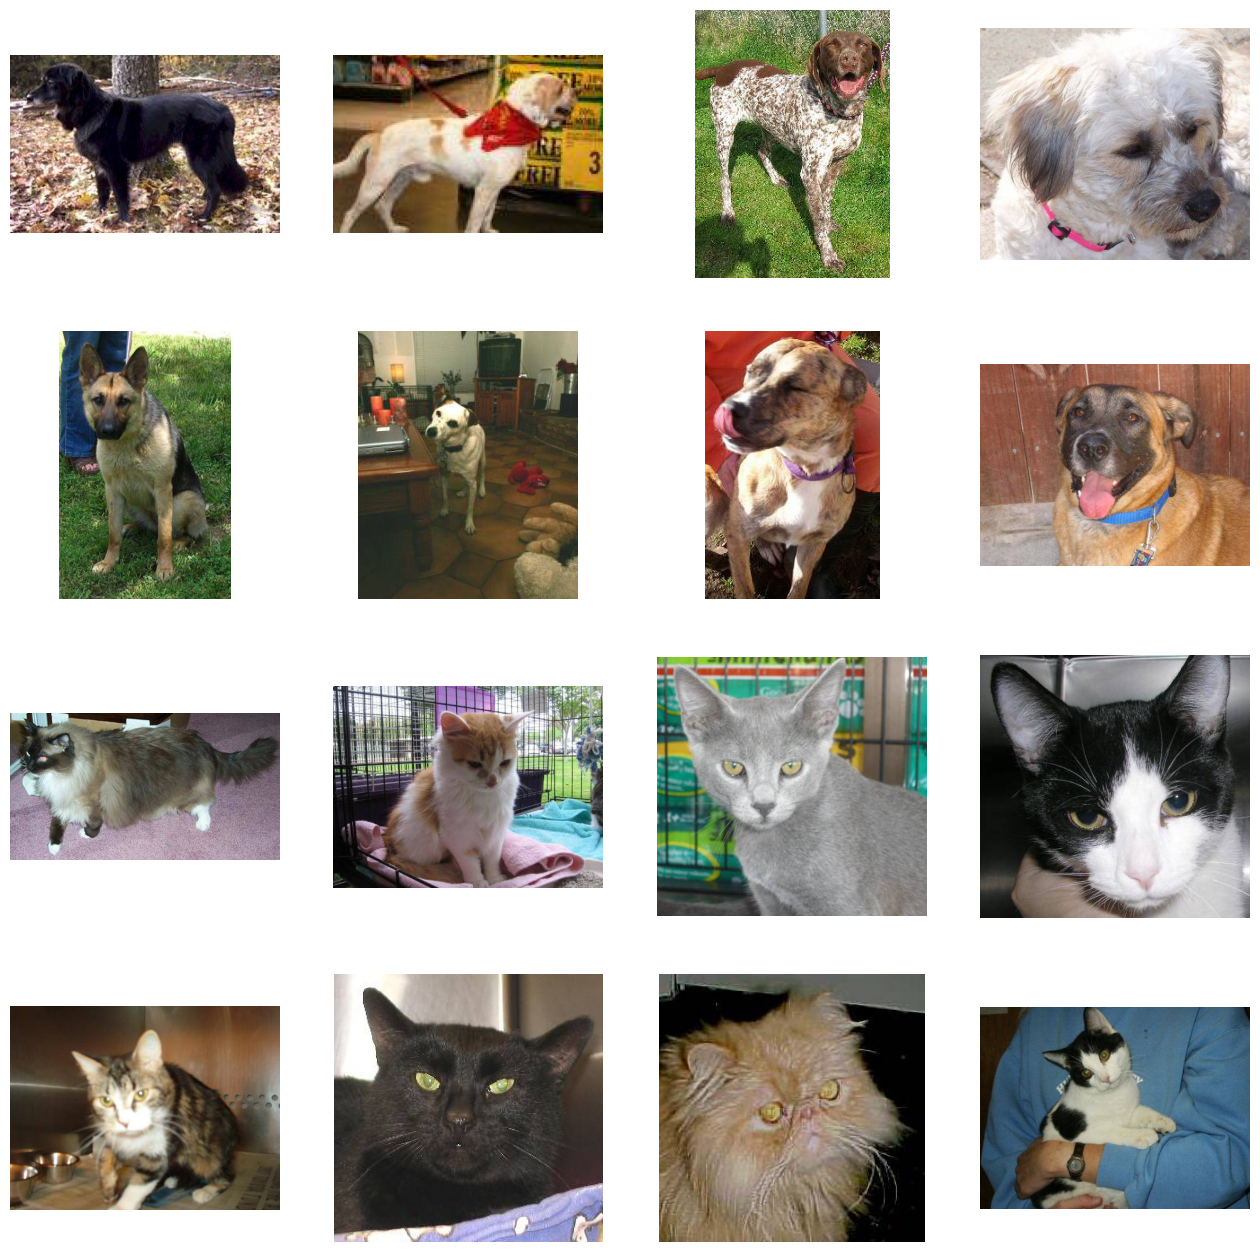

In [13]:
fig = plt.gcf()
fig.set_size_inches(nclos * 4, nrows * 4)

pic_index += 8

next_dog_pix = [os.path.join(train_dog_dir, fname)for fname in train_dog_names[pic_index -8 :pic_index]]
next_cat_pix = [os.path.join(train_cat_dir, fname)for fname in train_cats_names[pic_index -8 :pic_index]]

for i, img_path in enumerate(next_dog_pix + next_cat_pix):
    sp = plt.subplot(nrows, nclos, i+ 1)
    sp.axis('OFF')

    img = mping.imread(img_path)
    plt.imshow(img)
plt.show()

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)

training_set = train_datagen.flow_from_directory(r'D:\Project3\training_set', target_size= (64,64), batch_size= 32, class_mode= 'binary')

Found 8000 images belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale= 1./255)

validation_set = test_datagen.flow_from_directory(r'D:\Project3\validation_set', target_size= (64,64), batch_size= 32, class_mode= 'binary')

Found 2000 images belonging to 2 classes.


In [17]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu', input_shape = [64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 128, activation= 'relu'))

cnn.add(tf.keras.layers.Dense(units = 1, activation= 'sigmoid'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [20]:
cnn.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [21]:
cnn.fit(x = training_set, validation_data = validation_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 26s 78ms/step - loss: 0.6578 - accuracy: 0.6034 - val_loss: 0.5909 - val_accuracy: 0.6905
Epoch 2/25
250/250 [==============================] - 18s 73ms/step - loss: 0.5766 - accuracy: 0.7003 - val_loss: 0.6024 - val_accuracy: 0.6990
Epoch 3/25
250/250 [==============================] - 18s 73ms/step - loss: 0.5415 - accuracy: 0.7218 - val_loss: 0.5302 - val_accuracy: 0.7375
Epoch 4/25
250/250 [==============================] - 18s 72ms/step - loss: 0.5152 - accuracy: 0.7415 - val_loss: 0.4881 - val_accuracy: 0.7635
Epoch 5/25
250/250 [==============================] - 19s 76ms/step - loss: 0.4894 - accuracy: 0.7657 - val_loss: 0.4882 - val_accuracy: 0.7705
Epoch 6/25
250/250 [==============================] - 20s 80ms/step - loss: 0.4763 - accuracy: 0.7713 - val_loss: 0.4665 - val_accuracy: 0.7875
Epoch 7/25
250/250 [==============================] - 18s 73ms/step - loss: 0.4583 - accuracy: 0.7893 - val_loss: 0.4608 - val_accuracy:

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img(r'D:\Project3\tai-anh-cho-dep.webp', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis= 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

1/1 [==============================] - 0s 13ms/step


In [28]:
print(prediction)

dog
